In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler,LabelEncoder

Load the McDonald's dataset

In [9]:
mcdonalds = pd.read_csv("/content/mcdonalds.csv")

Extract the relevant variables

In [10]:
variables = ["yummy", "convenient", "spicy", "fattening", "greasy", "fast", "cheap", "tasty",
             "expensive", "healthy", "disgusting", "Like", "Age", "VisitFrequency", "Gender"]
data = mcdonalds[variables]

Convert categorical variables to numeric

In [11]:
label_encoder = LabelEncoder()
for col in ["yummy", "convenient", "spicy", "fattening", "greasy", "fast", "cheap", "tasty",
            "expensive", "healthy", "disgusting", "Like", "VisitFrequency", "Gender"]:
    data[col] = label_encoder.fit_transform(data[col])


Handle missing values

In [12]:
data = data.replace({"I love it!+5": 5, "I hate it!-5": -5})

Standardize the data

In [13]:
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

Perform Principal Component Analysis (PCA)

In [15]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_std)

Perform K-means clustering

In [16]:
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans_labels = kmeans.fit_predict(data_std)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Perform Gaussian Mixture Model (GMM)

In [17]:
gmm = GaussianMixture(n_components=4, random_state=1234, n_init=10)
gmm_labels = gmm.fit_predict(data_std)

Visualization - Scatter plot with PCA

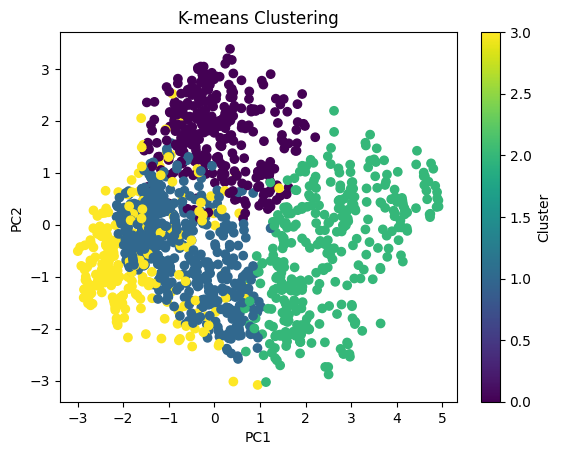

In [18]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap="viridis")
plt.title("K-means Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()

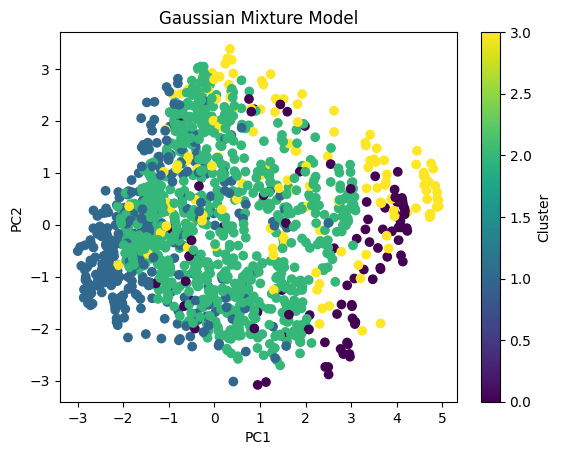

In [19]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=gmm_labels, cmap="viridis")
plt.title("Gaussian Mixture Model")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()

Bar plot of cluster sizes for K-means clustering

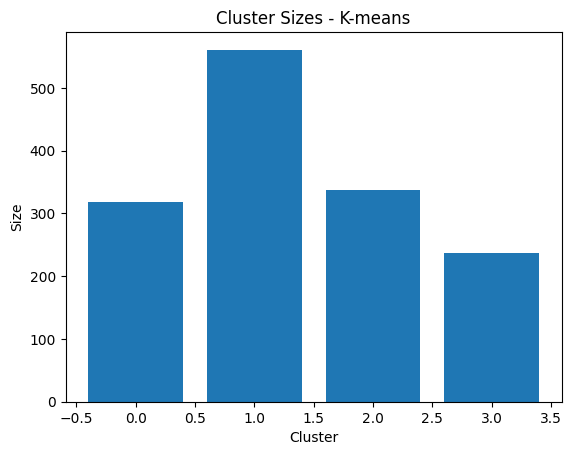

In [20]:
kmeans_cluster_sizes = pd.Series(kmeans_labels).value_counts().sort_index()
plt.bar(kmeans_cluster_sizes.index, kmeans_cluster_sizes.values)
plt.title("Cluster Sizes - K-means")
plt.xlabel("Cluster")
plt.ylabel("Size")
plt.show()

Bar plot of cluster sizes for GMM

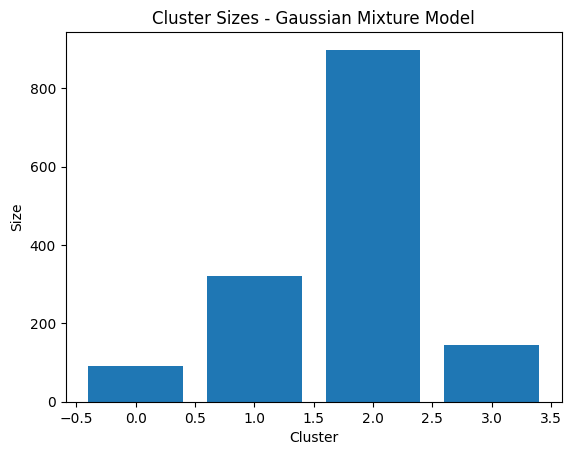

In [21]:
gmm_cluster_sizes = pd.Series(gmm_labels).value_counts().sort_index()
plt.bar(gmm_cluster_sizes.index, gmm_cluster_sizes.values)
plt.title("Cluster Sizes - Gaussian Mixture Model")
plt.xlabel("Cluster")
plt.ylabel("Size")
plt.show()

Explained variance ratio plot for PCA

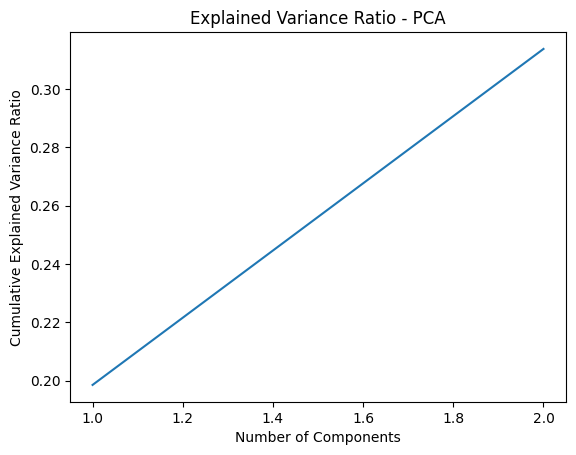

In [22]:
plt.plot(np.arange(1, pca.n_components_ + 1),
         np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained Variance Ratio - PCA")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.show()